In [1]:
#importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Input data files are available in the "input/" directory.
train=pd.read_csv("input/trainSet.xls")  #reading the train dataset
test=pd.read_csv("input/testSet.xls")  #reading the test dataset

In [3]:
train.info()       #information about the training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.corr()                                       #correlation between different variable

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


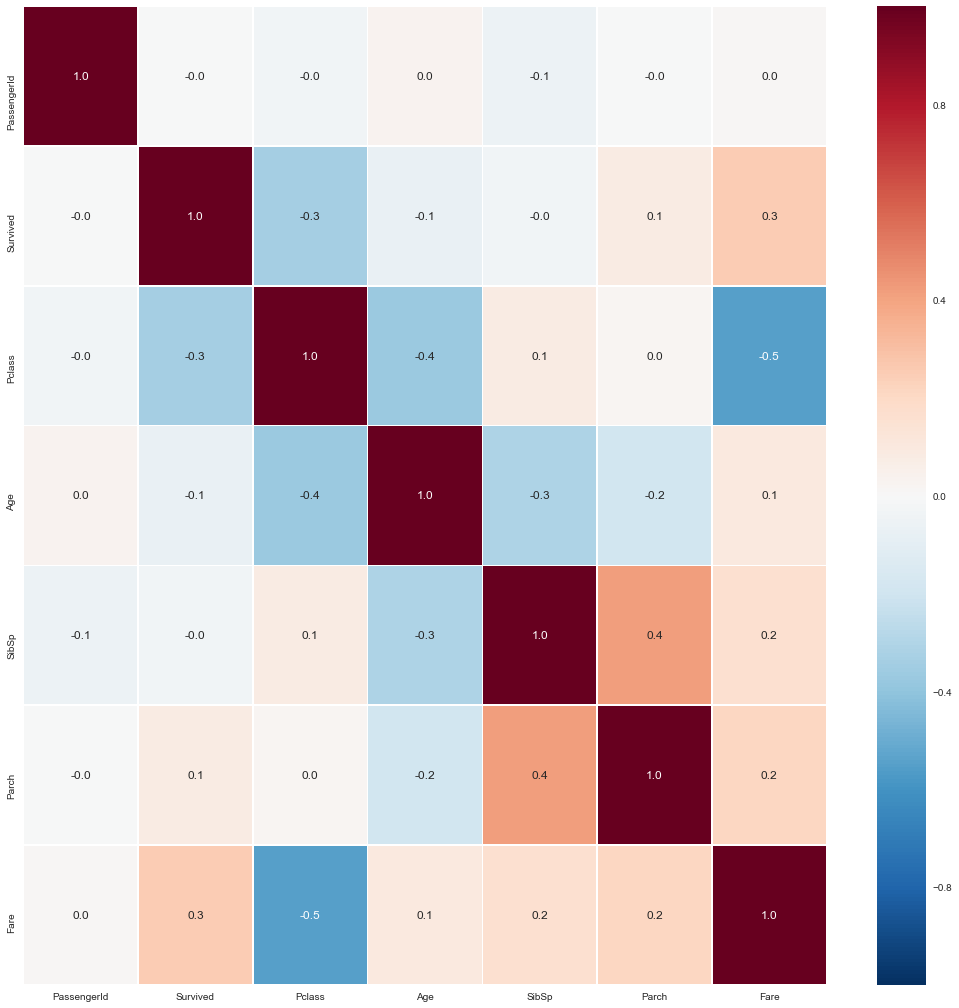

In [5]:
#correlation plot
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


In [6]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train.count()  #Counting the no of items in each column

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
#fraction of total people who survived
train.Survived.value_counts(normalize = True)


0    0.616162
1    0.383838
Name: Survived, dtype: float64

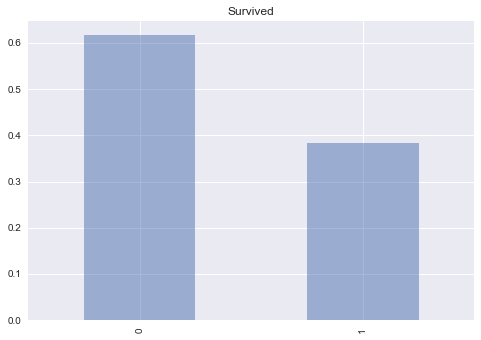

In [9]:
train.Survived.value_counts(normalize = True).plot(kind ="bar", alpha = 0.5)
plt.title("Survived")
plt.show()

In [10]:
#Survival wrt Gender
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


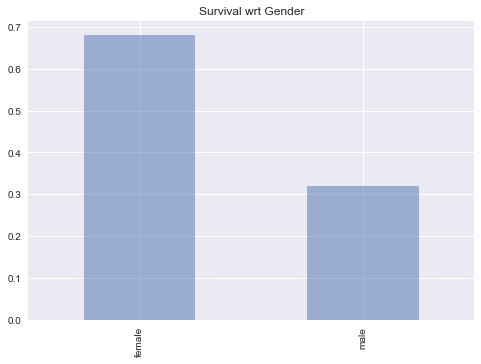

In [11]:
#plot for the above data
train.Sex[train.Survived==1].value_counts(normalize = True).plot(kind ="bar", alpha = 0.5)
plt.title("Survival wrt Gender")
plt.show()

In [12]:
#Survival wrt Class And Gender
train[["Pclass", "Sex","Survived"]].groupby(['Pclass','Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


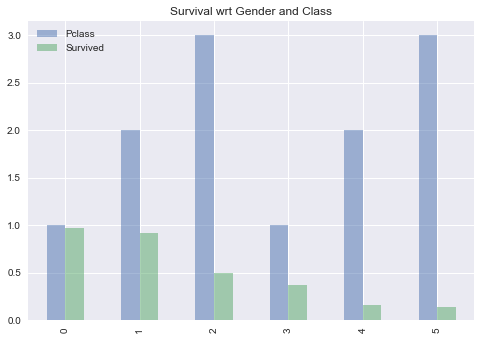

In [13]:
#Visualisation of the above Querry
train[["Sex","Pclass", "Survived"]].groupby(['Sex','Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).plot(kind ="bar", alpha = 0.5)
plt.title("Survival wrt Gender and Class")
plt.show()

In [14]:
#Survival wrt Age
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Age,Survived
0,0.42,1.000000
9,5.00,1.000000
79,63.00,1.000000
68,53.00,1.000000
1,0.67,1.000000
17,13.00,1.000000
16,12.00,1.000000
87,80.00,1.000000
2,0.75,1.000000
4,0.92,1.000000


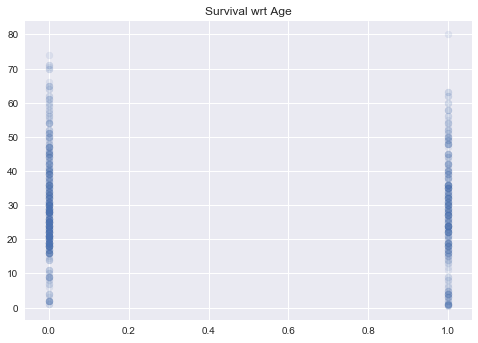

In [15]:
#Visualisation for the above Querry
plt.scatter(train.Survived, train.Age, alpha = 0.1)
plt.title("Survival wrt Age")
plt.show()

In [16]:
#Survival wrt Class
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


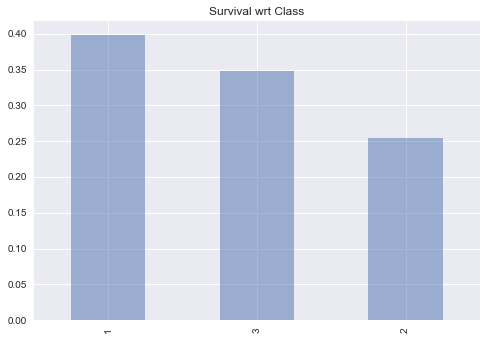

In [17]:
#Visualisation for the above Querry
train.Pclass[train.Survived==1].value_counts(normalize = True).plot(kind ="bar", alpha = 0.5)
plt.title("Survival wrt Class")
plt.show()

In [18]:
#Survival wrt SibSp 
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


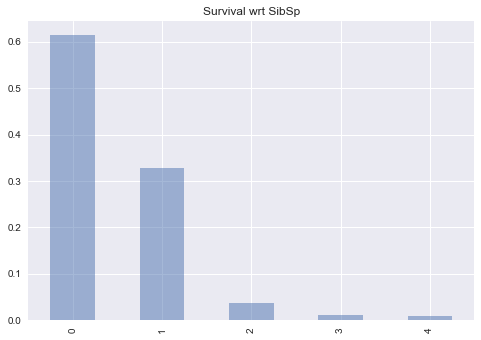

In [19]:
#Visualisation for the above Querry
train.SibSp[train.Survived==1].value_counts(normalize = True).plot(kind ="bar", alpha = 0.5)
plt.title("Survival wrt SibSp")
plt.show()

In [20]:
#Survival wrt Parch 
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [21]:
#Survival wrt Class and SibSp
train[["Pclass", "SibSp","Survived"]].groupby(['Pclass','SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,SibSp,Survived
7,2,3,1.000000
2,1,2,0.800000
1,1,1,0.746479
3,1,3,0.666667
5,2,1,0.581818
0,1,0,0.562044
6,2,2,0.500000
4,2,0,0.416667
10,3,2,0.333333
9,3,1,0.325301


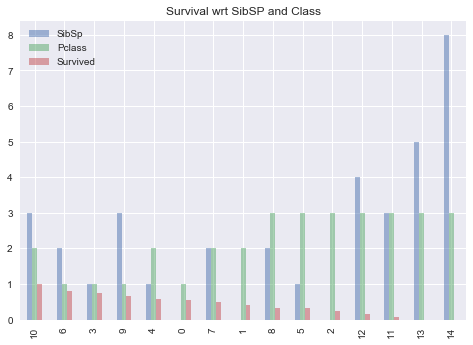

In [22]:
train[["SibSp","Pclass", "Survived"]].groupby(['SibSp','Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).plot(kind ="bar", alpha = 0.5)
plt.title("Survival wrt SibSP and Class")
plt.show()

In [23]:
#Survival wrt Parch and SibSp
train[["Parch", "SibSp","Survived"]].groupby(['Parch','SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Parch,SibSp,Survived
16,3,0,1.000000
3,0,3,1.000000
18,3,2,1.000000
6,1,2,0.857143
9,2,0,0.724138
4,1,0,0.657895
10,2,1,0.631579
5,1,1,0.596491
1,0,1,0.520325
11,2,2,0.500000


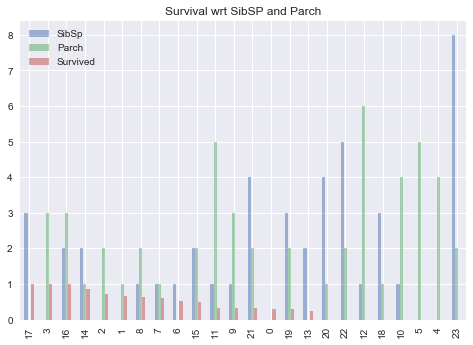

In [24]:
train[["SibSp","Parch", "Survived"]].groupby(['SibSp','Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False).plot(kind ="bar", alpha = 0.5)
plt.title("Survival wrt SibSP and Parch")
plt.show()

In [26]:
#Survival wrt the person in the Respective Cabin
train[["Cabin","Survived"]].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
73,C62 C64,1.0
97,D21,1.0
94,D17,1.0
95,D19,1.0
60,C148,1.0
96,D20,1.0
58,C126,1.0
57,C125,1.0
127,E40,1.0
111,D56,1.0
